In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf

import sqlite3
import pandas as pd

In [3]:
filename = 'too_combined_s1.0_v3.4_10yrs.db'
name = filename.replace('.db', '')
out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)

In [3]:
bundle_list = []

too_types = ["ToO, GW_case%", "ToO, BBH%", "ToO, LensedBNS%", "ToO, neutrino%", "ToO, SSO%"]

for too_type in too_types:
    sql = "note like '%s'" % too_type
    # col here could be anything
    metric = maf.metrics.CountMetric(col=['night'], metric_name='Nvis')
    # Select all the visits. Could do something like 'filter="r"' 
    slicer = maf.slicers.HealpixSlicer()
    bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=name))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:143: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn(


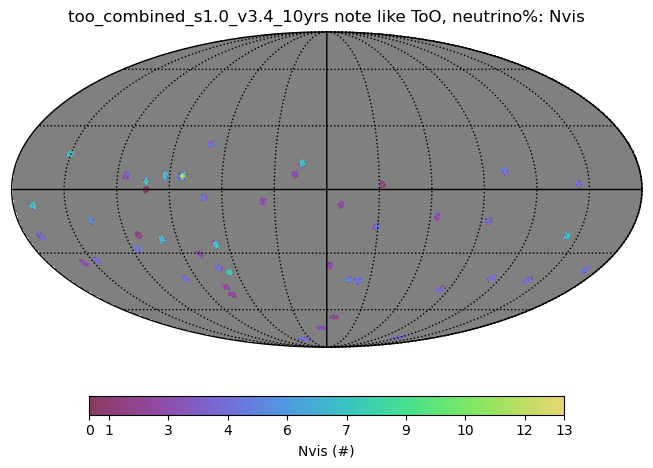

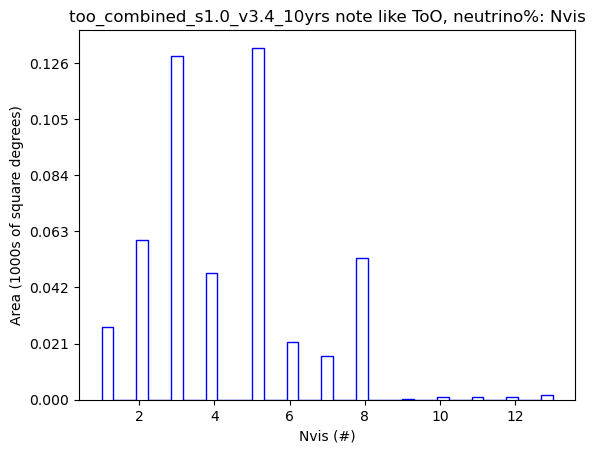

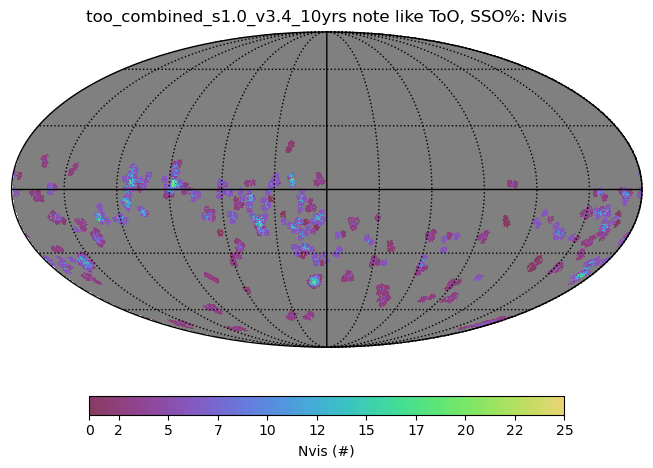

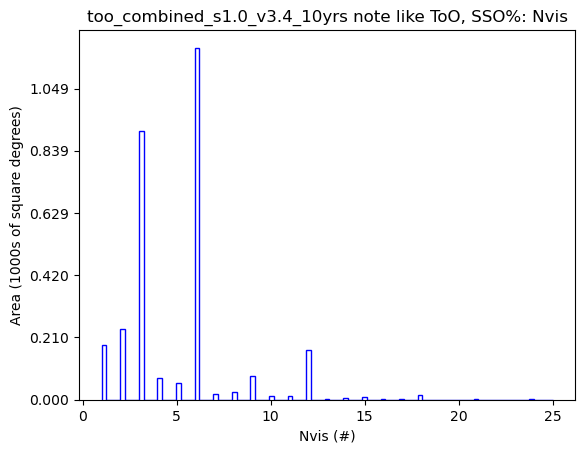

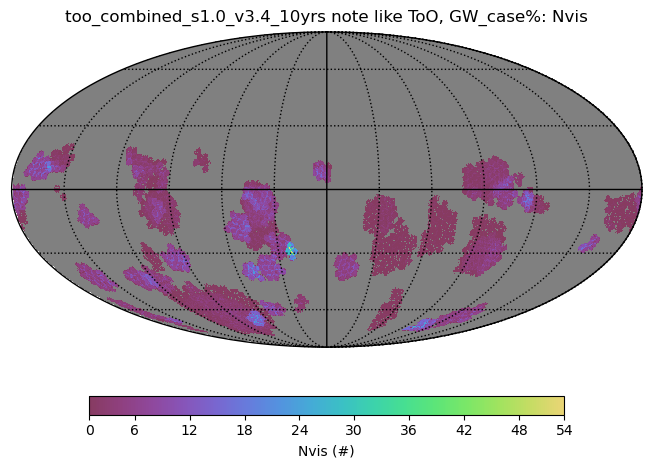

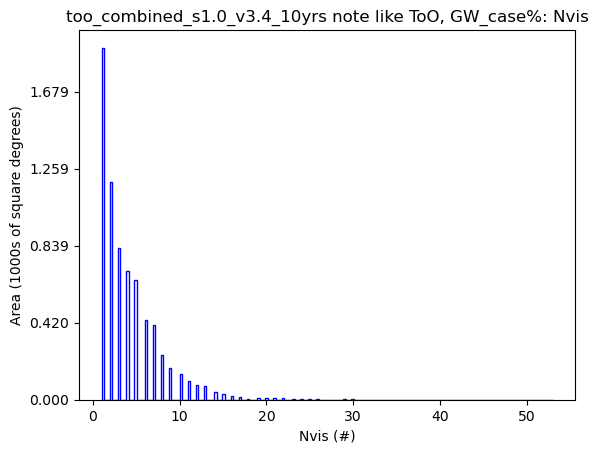

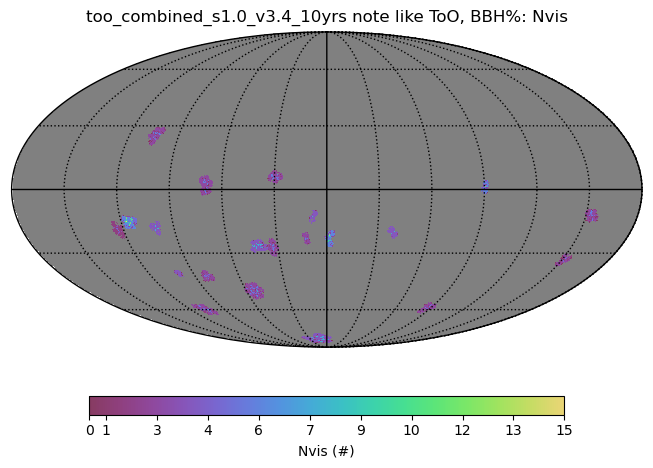

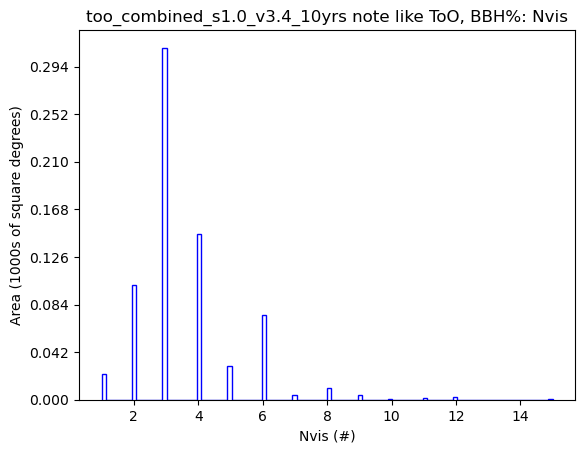

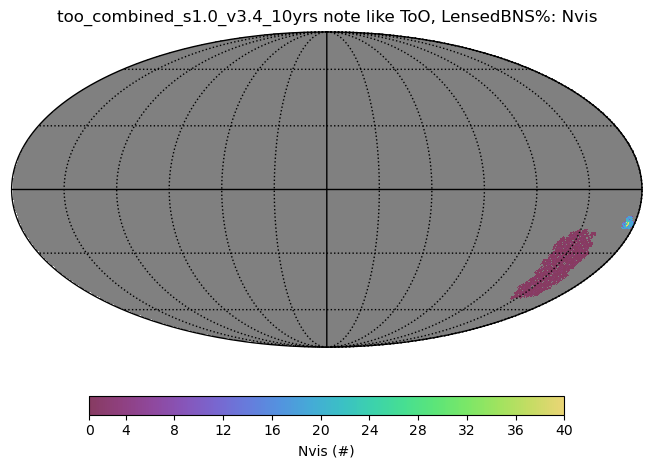

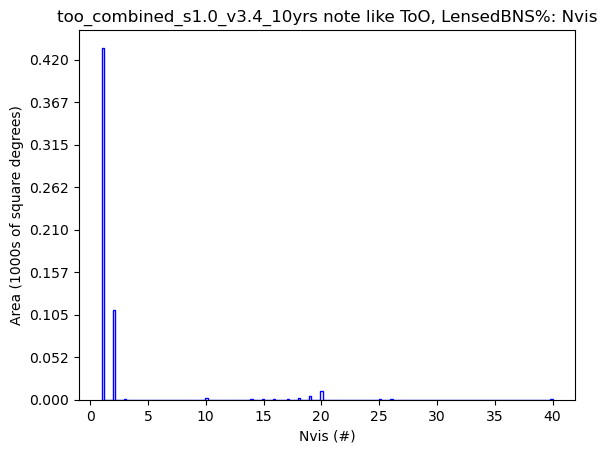

In [4]:
bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, filename, out_dir=out_dir, results_db=results_db)
bg.run_all()
bg.plot_all(closefigs=False)




In [16]:
types = ['GW']

con = sqlite3.connect(filename)

df = pd.read_sql("select distinct(note) from observations where note like '%ToO%GW%'", con)
print(np.unique([note.split(',')[-1].split('_')[0] for note in df['note']]).size)

df = pd.read_sql("select distinct(note) from observations where note like '%ToO%neu%'", con)
print(np.unique([note.split(',')[-1].split('_')[0] for note in df['note']]).size)

df = pd.read_sql("select distinct(note) from observations where note like '%ToO%SSO%'", con)
print(np.unique([note.split(',')[-1].split('_')[0] for note in df['note']]).size)


con.close()


53
46
157


In [17]:
types = ['GW']

con = sqlite3.connect('too_combined_s2.0_v3.4_10yrs.db')

df = pd.read_sql("select distinct(note) from observations where note like '%ToO%GW%'", con)
print(np.unique([note.split(',')[-1].split('_')[0] for note in df['note']]).size)

df = pd.read_sql("select distinct(note) from observations where note like '%ToO%neu%'", con)
print(np.unique([note.split(',')[-1].split('_')[0] for note in df['note']]).size)

df = pd.read_sql("select distinct(note) from observations where note like '%ToO%SSO%'", con)
print(np.unique([note.split(',')[-1].split('_')[0] for note in df['note']]).size)


con.close()

106
46
153
